In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')

In [2]:
# loading the dataset
df =pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\28. Capstone Project\\admission_predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# exploring the dataset

In [3]:
df.shape

(500, 9)

In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [8]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df=df.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','Chance of Admit':'Probability','University Rating':'UR'})
df.head()

,Serial No.,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# DATA VISUALIZATION

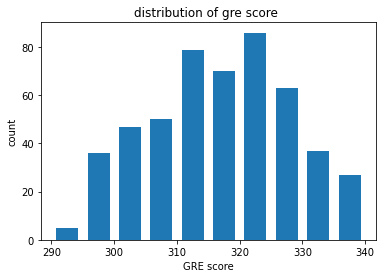

In [11]:
fig = plt.hist(df['GRE'], rwidth = 0.7)
plt.title('distribution of gre score ')
plt.xlabel('GRE score')
plt.ylabel('count')
plt.show ()

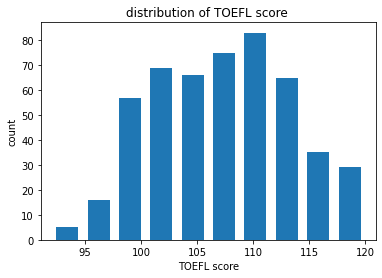

In [12]:
fig = plt.hist(df['TOEFL'], rwidth = 0.7)
plt.title('distribution of TOEFL score ')
plt.xlabel('TOEFL score')
plt.ylabel('count')
plt.show ()

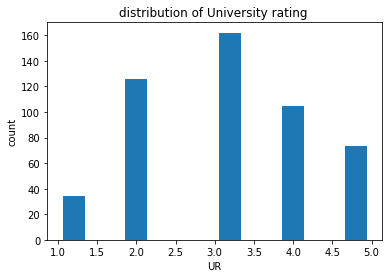

In [13]:
fig = plt.hist(df['UR'], rwidth = 0.7)
plt.title('distribution of University rating ')
plt.xlabel('UR')
plt.ylabel('count')
plt.show ()

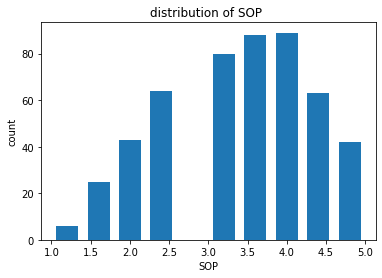

In [14]:
fig = plt.hist(df['SOP'], rwidth = 0.7)
plt.title('distribution of SOP ')
plt.xlabel('SOP')
plt.ylabel('count')
plt.show ()

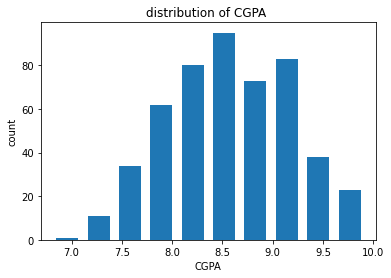

In [15]:
fig = plt.hist(df['CGPA'], rwidth = 0.7)
plt.title('distribution of CGPA ')
plt.xlabel('CGPA')
plt.ylabel('count')
plt.show ()

# data cleaning

In [16]:
df.drop('Serial No.',axis = 'columns', inplace=True)
df.head()

,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
df1=df.copy(deep=True)
df1

,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [18]:
x=df1.iloc[:,0:7]
y=df1.iloc[:,7]


In [19]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [20]:
# using gridsearch to find the best algorithm for this problem


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

## creating a function to calculate best model for this problem

In [21]:
def find_best_model(x,y):
    models = {'lr':{'model':LinearRegression(),
                    'parameters':{'normalize':[True,False]}},
              
              'lasso':{'model':Lasso(),'parameters':{'alpha':[1,2],
                       'selection':['random','cyclic'] }},
              
              'svr':{'model':SVR(),
                    'parameters':{'gamma':['auto','scale']}},
              
              'dtc':{'model':DecisionTreeRegressor(),
                     'parameters':{'criterion':['mse','friedman_mse'],
                       'splitter':['best','random'] }},
              
              'rfc':{'model':RandomForestRegressor(criterion='squared_error'),
                     'parameters':{'n_estimators':[5,10,15,20]}},
               
              'knn':{'model':KNeighborsRegressor(algorithm='auto'),
                     'parameters':{'n_neighbors':[2,10,5,20]}}}
            
    scores = []
    for model_name,model_params in models.items():
            gs= GridSearchCV(model_params['model'],model_params['parameters'],
                            cv=5,return_train_score = False)
            gs.fit(x,y)
            scores.append({'model':model_name,
                          'best_parameters':gs.best_params_,
                          'score':gs.best_score_})
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])

     
find_best_model(x,y)             

,model,best_parameters,score
0,lr,{'normalize': False},0.810802
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,{'gamma': 'scale'},0.654099
3,dtc,"{'criterion': 'mse', 'splitter': 'random'}",0.582356
4,rfc,{'n_estimators': 15},0.776630
5,knn,{'n_neighbors': 20},0.723017


In [22]:
from sklearn.model_selection import cross_val_score
cv= cross_val_score(LinearRegression(normalize = True),x,y,cv=5)
print('highest accuracy: {}%'.format(round(sum(cv)*100/len(cv)),3))

highest accuracy: 81%


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,
                                                random_state=5)
print(len(x_train),len(x_test))

400 100


In [24]:
model = LinearRegression(normalize = True)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8214787365889661

In [25]:
# prediction 1
print ('chance of getting into ucla is {}%'.format(round
        (model.predict([[337,118,4,4.5,4.8,9.2,0]])[0]*100,3)))

chance of getting into ucla is 87.723%


In [26]:
# prediction 1
print ('chance of getting into ucla is {}%'.format(round
        (model.predict([[310,110,4,4.5,5,9.5,0]])[0]*100,3)))

chance of getting into ucla is 84.882%


In [27]:
alist = [5,10,15,25]

In [28]:
print(alist[::-2])

[25, 10]
